<a href="https://colab.research.google.com/github/shemaaali/DS-Unit-4-Sprint-1-NLP/blob/main/LS_DS_412_Vector_Representations_Assignment/SA2__LS_DS_422_BOW_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [7]:
# Dependencies for the week (instead of conda)
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
!pip install -r requirements.txt

--2020-09-29 19:34:00--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     137  --.-KB/s    in 0s      

2020-09-29 19:34:00 (7.37 MB/s) - ‘requirements.txt’ saved [137/137]

     |████████████████████████████████| 24.2MB 171kB/s 
     |████████████████████████████████| 1.6MB 47.3MB/s 
     |████████████████████████████████| 10.4MB 44.9MB/s 
     |████████████████████████████████| 7.1MB 45.5MB/s 
     |████████████████████████████████| 215kB 50.5MB/s 
     |████████████████████████████████| 2.2MB 46.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.w

In [8]:
!python -m spacy download en_core_web_lg  # Can do lg, takes awhile
# Also on Colab, need to restart runtime after this step!

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=3617d465655afdc4f385ef8ec07d5df48f911cde410446164c76fd1fb4a4aa76
  Stored in directory: /tmp/pip-ephem-wheel-cache-9hwfeojy/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [19]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import spacy
import html.parser
from lxml import html
from bs4 import BeautifulSoup

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [14]:
from bs4 import BeautifulSoup
import requests

url = "https://raw.githubusercontent.com/shemaaali/DS-Unit-4-Sprint-1-NLP/main/module2-vector-representations/data/job_listings.csv"
df = pd.read_csv(url, index_col=0)
print(df.shape)
df.head()


(426, 2)


,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [17]:
# Load the pre-trained statistical model for English
import en_core_web_lg

# setting up natural language processor and tokenizer
nlp = en_core_web_lg.load()

tokenizer = spacy.tokenizer.Tokenizer(nlp.vocab)

# creates stop words
STOPWORDS = nlp.Defaults.stop_words.union({' ', ''})

In [20]:

# makes a copy of df
df1 = df.copy()

# removes html elements with lxml
df1['description'] = df1['description'].apply(lambda x: html.fromstring(x).text_content())

# replaces new line charecters with space
df1['description'] = df1['description'].apply(lambda x: x.replace('\\n', ' '))

# removes punctuation with regex
df1['description'] = df1['description'].apply(lambda x: re.sub(r'[^a-zA-Z ]', '', x))

# removes the b at the start of every string
df1['description'] = df1['description'].apply(lambda x: x[1:])

# makes all words lowercase
df1['description'] = df1['description'].apply(lambda x: x.lower())

In [21]:
df1.head()

,description,title
0,job requirements conceptual understanding in m...,Data scientist
1,job description as a data scientist you will...,Data Scientist I
2,as a data scientist you will be working on con...,Data Scientist - Entry Level
3,a monthcontractunder the general supervisio...,Data Scientist
4,location usa xexx multiple locations years of...,Data Scientist


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [28]:
vect = CountVectorizer(stop_words='english', min_df=0.02, max_df=0.90, lowercase=True)

vect.fit(df1['description'])

dtm = vect.transform(df1['description'])

dfWords = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

dfWords.head()

,ab,abilities,ability,able,academic,accelerate,accept,access,accessible,accommodation,accommodations,accomplish,accordance,according,account,accountability,accounts,accredited,accuracy,accurate,achieve,achieving,acquire,acquisition,act,action,actionable,actions,active,actively,activities,acumen,ad,add,addition,additional,address,addressing,adept,adhoc,...,weve,wexexxre,whatxexxs,wide,wider,willing,willingness,win,women,word,work,worked,workflows,workforce,working,worklife,workload,workplace,works,world,worldclass,worlds,worldwide,worldxexxs,wrangling,write,writing,written,xexx,xexxcbig,year,years,yearsxexx,yes,york,youll,youre,youxexxll,youxexxre,youxexxve
0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,2,0,0,0,0,1,0,0,0,4,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [29]:
# create the most common words and the top 10

common_words = pd.DataFrame(dfWords.sum().sort_values(ascending=False))

common_words.reset_index(inplace=True)

common_words.columns=['word', 'count']

top_words = common_words.head(10)

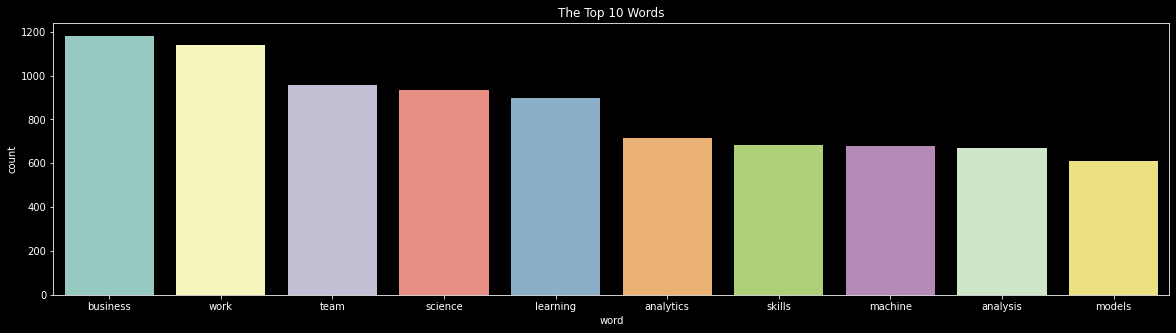

In [30]:
# Graph the top 10 words
plt.style.use('dark_background')
plt.figure(figsize=(20, 5))
sns.barplot(x=top_words['word'], y=top_words['count']).set_title("The Top 10 Words");

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [32]:
tfidf = TfidfVectorizer(stop_words='english', min_df = 0.2, max_df=0.99, ngram_range=(1,2), lowercase=True)

sparse_dtm = tfidf.fit_transform(df1['description'])

df2 = pd.DataFrame(sparse_dtm.todense(), columns=tfidf.get_feature_names())

In [33]:
df2.head()

,ability,able,advanced,age,algorithms,analyses,analysis,analytical,analytics,analyze,andor,applicants,applications,applied,apply,based,benefits,best,better,big,big data,build,building,business,closely,collaborate,color,committed,communicate,communication,communication skills,company,complex,computer,computer science,create,customer,customers,data analysis,data mining,...,solutions,solve,solving,sources,spark,sql,stakeholders,statistical,statistics,status,strong,support,systems,team,teams,technical,techniques,technologies,technology,testing,time,tools,understand,understanding,use,using,value,variety,various,verbal,veteran,veteran status,visualization,way,work,working,world,written,years,years experience
0,0.295921,0.0,0.000000,0.000000,0.00000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.212176,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.193487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.160406,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.176821,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.112122,0.000000,0.000000,0.000000,0.0000,0.0
1,0.053355,0.0,0.000000,0.000000,0.00000,0.0,0.04663,0.061912,0.000000,0.0,0.000000,0.000000,0.354537,0.0000,0.000000,0.0,0.0,0.144232,0.0,0.073858,0.0,0.058488,0.0,0.043865,0.0,0.000000,0.000000,0.0,0.069772,0.062640,0.073603,0.059648,0.063762,0.108701,0.115049,0.000000,0.074632,0.071874,0.0,0.0,...,0.0,0.075964,0.087475,0.0,0.08387,0.053075,0.0,0.000000,0.000000,0.000000,0.115049,0.000000,0.0,0.168421,0.060674,0.173528,0.0,0.0,0.0,0.085267,0.149265,0.0,0.000000,0.063762,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.08353,0.161726,0.105873,0.069546,0.075425,0.0000,0.0
2,0.112852,0.0,0.134864,0.000000,0.14384,0.0,0.00000,0.130952,0.111384,0.0,0.165419,0.000000,0.000000,0.1725,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.123710,0.0,0.278342,0.0,0.000000,0.000000,0.0,0.000000,0.132491,0.000000,0.000000,0.134864,0.114958,0.121671,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.106878,0.108815,0.000000,0.000000,0.134064,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.180349,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.185828,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.111967,0.000000,0.000000,0.0000,0.0
3,0.000000,0.0,0.000000,0.148078,0.00000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.145211,0.319334,0.0000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.144101,0.138327,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.132135,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.269832,0.000000,0.000000,0.0,0.227547,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.118747,0.0,0.0,0.0,0.000000,0.0,0.139337,0.147494,0.0,0.00000,0.145667,0.000000,0.000000,0.000000,0.0000,0.0
4,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.00000,0.000000,0.225260,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.187637,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.313764,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.247427,0.0,0.0,0.0,0.000000,0.000000,0.0,0.314844,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.2145,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [34]:
# sets up nearest neighbor parameters
n_neighbor = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

# fits nearest neighbor model to tfidf vector matrix
n_neighbor.fit(df2)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [35]:
# querys a arbitrary job listing
n_neighbor.kneighbors([df2.iloc[10]])

(array([[0.        , 0.        , 0.95703421, 0.98988007, 1.01940862]]),
 array([[ 43,  10, 302, 311, 283]]))

In [38]:
# the same job listing was posted 
# more than once since this returns true

df1['description'][28] == df1['description'][12]

True

In [39]:
job_description = ['''
    In search of a entry level data scientist to join a team doing data science! \n
    The ideal candidate will be proficient in python as well as the following python libraries: \m
    pandas, numpy, seaborn, matplotlib, sklearn, and spacy
''']

job_transformed = tfidf.transform(job_description)

In [40]:
# looks for similar job postings

n_neighbor.kneighbors(job_transformed.todense())

(array([[1.10458443, 1.14209807, 1.14244028, 1.16469432, 1.17165091]]),
 array([[291, 421, 178, 401, 210]]))

In [42]:
# looks at most similar result

df1['description'][421]

'about us want to be part of a fantastic and fun startup thatxexxs revolutionizing the online travel advertising space want to join a data science team thats growing fast and making a big impact on the business come join us at sojern  on the deloitte fast  for five years running sojern applies technology to the travel advertising space delivering b in bookings for the thousands of hotel airline and cruise companies that make up our customer base  the team it is an exciting time to join the data science team at sojern business is booming and the team plays a key role in sojerns mission by automating analyzing modeling and optimizing the way we target potential travelers with the most relevant and timely travel ads  the data science team collaborates with product to define projects analyze data sets and build solutions example projects include   delivering a better understanding of why a traveler books a hotel or flight and utilizing those insights in production models which are used to 

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 